<a href="https://colab.research.google.com/github/uncomforming/selflearning/blob/main/%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pillow ipython scipy mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.tree import export_graphviz
import graphviz
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
Ir=LinearRegression().fit(X_train,y_train)
ridge=Ridge().fit(X_train,y_train)
ridge10=Ridge(alpha=10).fit(X_train,y_train)#汎化より
ridge01=Ridge(alpha=.1).fit(X_train,y_train)#訓練より
lasso=Lasso().fit(X_train,y_train)
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
def plot_feature_importances_canser(model):
  n_features=cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align="center")
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")


     |████████████████████████████████| 540 kB 5.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=8dd0b07a758527aaa716a12727bd83a963ae12045217669a9cb659ee8d1e39de
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

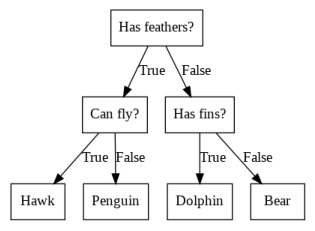

In [2]:
mglearn.plots.plot_animal_tree()

決定木での学習は正解に最も早くたどり着けるYes/No質問（機械学習ではテストと呼ばれる）の学習を意味する。
分類等が終わった葉の事を純粋と呼ぶ。
全ての葉が純粋になるまで学習を行うとモデルが複雑になりすぎ、過学習を起こす恐れがある。
過学習の対策として構築過程で木の成長を止める「事前枝刈り」と構築した木の中で情報量の少ないノードを削除する「事後枝刈り」の二つがある。
また、事前枝刈りには深さの制限や葉の最大数を制限する方法などがある

実際に構築してみる

In [3]:

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(f"訓練セットの精度{tree.score(X_train,y_train)}")
print(f"テストセットの精度{tree.score(X_test,y_test)}")

訓練セットの精度1.0
テストセットの精度0.9370629370629371


訓練データが100％：葉が純粋だから
決定木の深さに制約を与えないといくらでも深く、複雑になる。
max_depthを用いて深さに制限を与えた場合は以下のようになる。

In [4]:
treemax4=DecisionTreeClassifier(max_depth=4,random_state=0)
treemax4.fit(X_train,y_train)
print(f"訓練セットの精度{treemax4.score(X_train,y_train)}")
print(f"テストセットの精度{treemax4.score(X_test,y_test)}")

訓練セットの精度0.9882629107981221
テストセットの精度0.951048951048951


深さを制限したことにより訓練セットに対する精度は下がったが反対にテストセットに対する精度は上がった

また、決定木を可視化することもexport_graphvizを用いることで可能になる

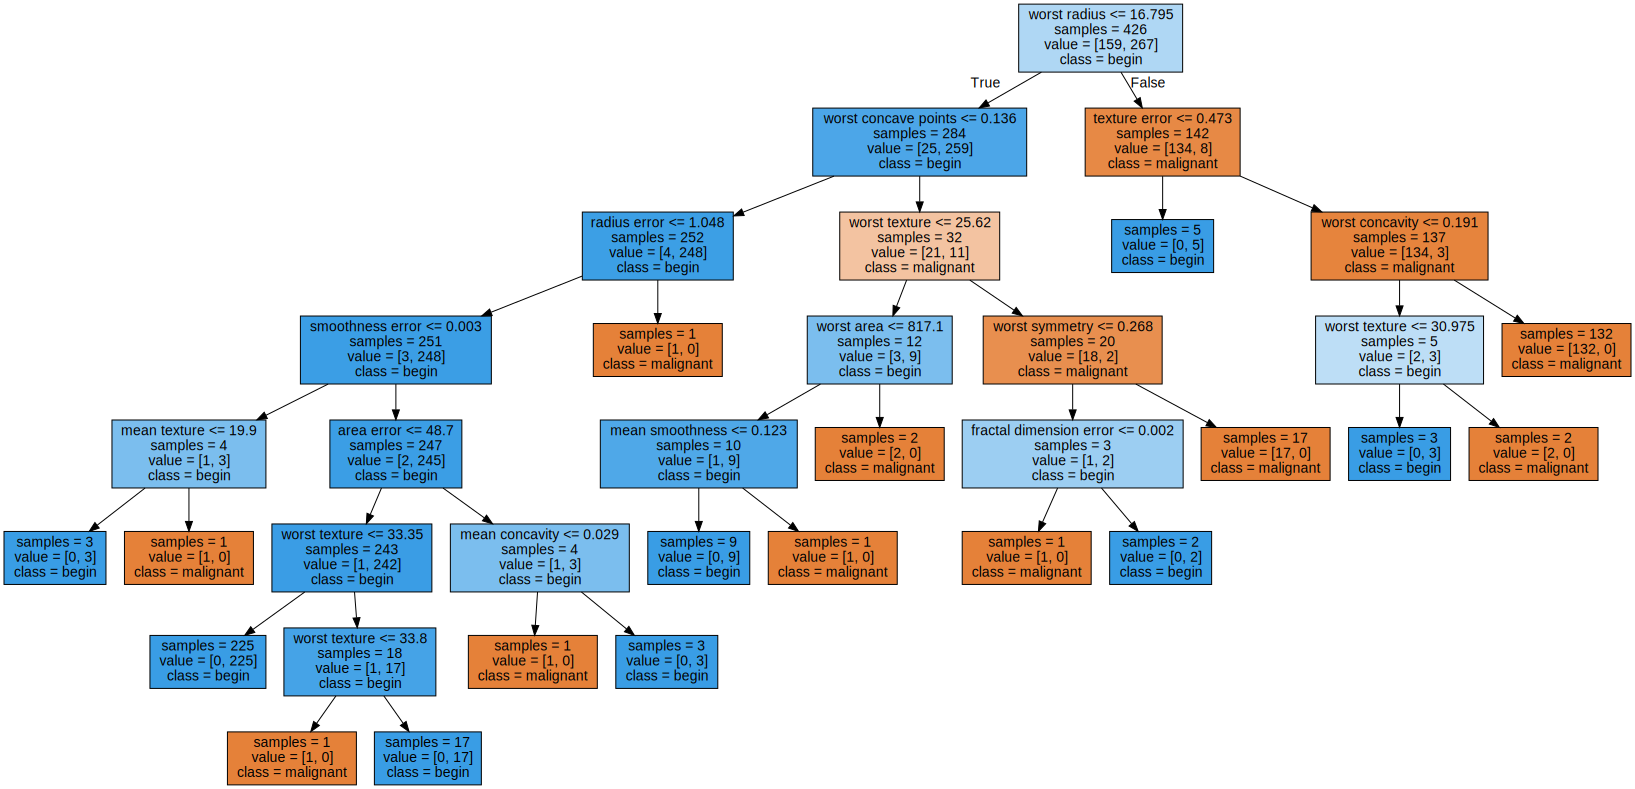

In [5]:
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","begin"],feature_names=cancer.feature_names,impurity=False,filled=True)
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

可視化することが可能なのでどのような理由で分類などがされたのかが分かりやすい。
しかし、すべてを見るのは大変なのでこの挙動を要約する特性値を見ることが多い。
この特性値としてよく使われるものが特徴量の重要度である。


In [6]:
print(f"特徴量の重要度:\n{tree.feature_importances_}")

特徴量の重要度:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [7]:
def plot_feature_importances_canser(model):
  n_features=cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align="center")
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

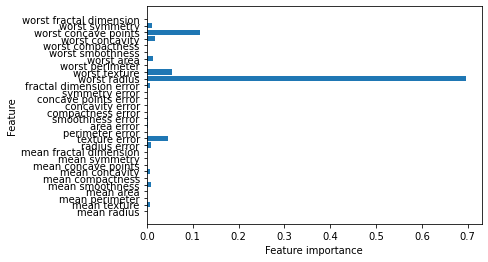

In [8]:
plot_feature_importances_canser(tree)

Feature importances: [0. 1.]


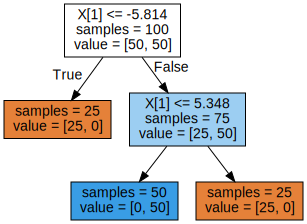

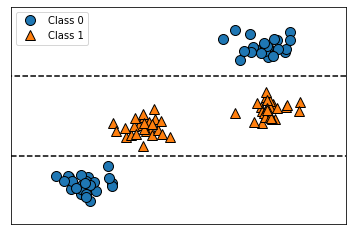

In [9]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

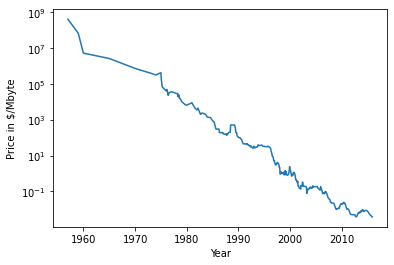

In [10]:
import os
ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [11]:
from sklearn.tree import DecisionTreeRegressor
#決定木を使い過去のデータから将来の価格を予測する
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]
#日付に基づいて価格を予測
X_train=data_train.date[:,np.newaxis]
#データとターゲットの関係を単純にするために対数変換
y_train=np.log(data_train.price)
tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)
#すべての価格を予測
X_all=ram_prices.date[:,np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)
#対数変換キャンセルのために逆変換
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


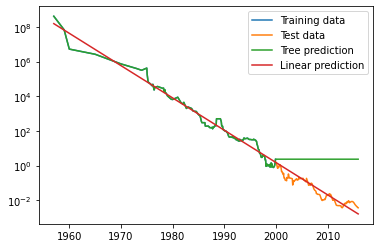

In [12]:
plt.semilogy(data_train.date,data_train.price,label="Training data")#訓練データ
plt.semilogy(data_test.date,data_test.price,label="Test data")#テストデータ
plt.semilogy(ram_prices.date,price_tree,label="Tree prediction")#決定木モデルによる予測
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")#線形回帰モデルによる予測
plt.legend()

決定木におけるモデルの複雑さを制御するパラメータは事前枝刈りパラメータである。
多くの場合、過剰適合を防ぐために事前枝刈り戦略を指定する「max_depth」（最大の深さ）「max_leaf_nodes」（最大の葉の数）「min_samples_leaf」（葉の構成に必要な最小サンプル数）のいずれが1つを選ぶだけで十分。
決定木の長所として結果のモデルが容易に可視化可能であったり、データスケールに対して完全に不変なことが挙げられる。
その反面、過学習が起きやすく、汎化性能が高くないことが短所としてあげられる。そこで次に説明するアンサンブル法が用いられることが多い

## **アンサンブル法**

アンサンブル法では複数の機械学習モデルを組み合わせることにより強力なモデルを作成する手法の事。
クラス分類や回帰にはランダムフォレストと勾配ブースティング決定木の2種のアンサンブル法が有効である。

ランダムフォレストは過剰適合（過学習）への対策手法の一つ。
少しずつ異なる決定木を複数作成してその結果を平均化や多数決を用いて利用する。
考え方としては違う方向に過学習をしている結果の平均をとることにより、丁度良い結果を得ようとすることである。
性質の違う決定木を作るために乱数を持ちいることからこの名がついた

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)#random_stateを用いて乱数シードを設定、stratifyでデータセットの特性を考慮した分割を行う
forest=RandomForestClassifier(n_estimators=10,random_state=2)#n_estimatorsで決定木の数を設定
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

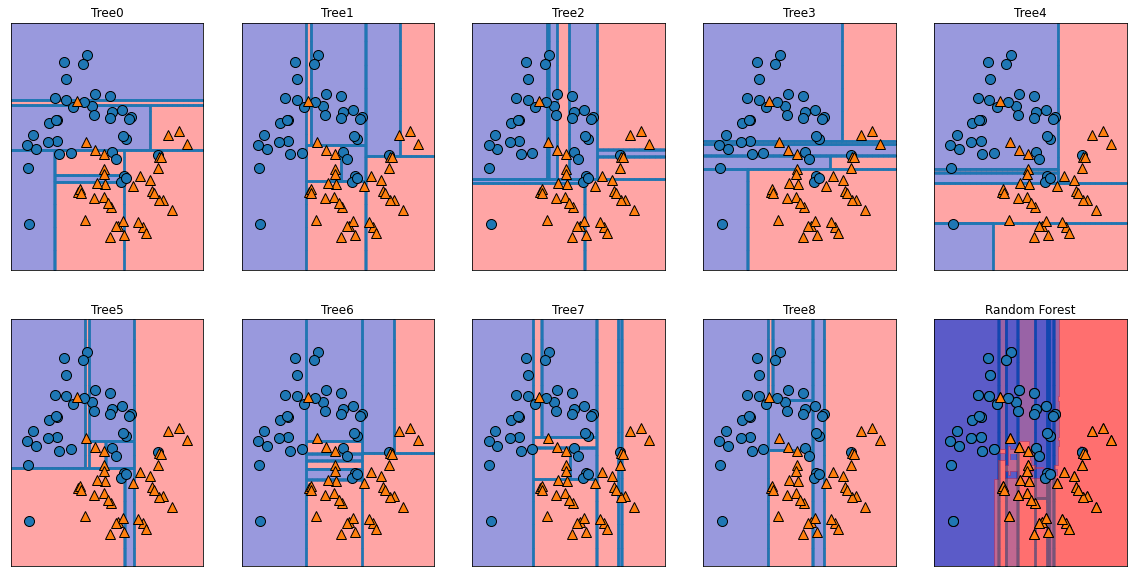

In [14]:
fig,axes=plt.subplots(2,5,figsize=(20,10))
for i ,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title(f"Tree{i}")
  mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

訓練データセットに対する精度:1.000
テストデータセットに対する精度:0.972


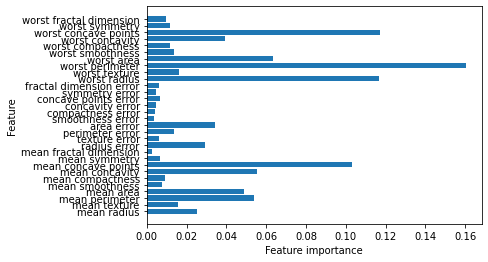

In [15]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
print(f"訓練データセットに対する精度:{forest.score(X_train,y_train):.3f}")
print(f"テストデータセットに対する精度:{forest.score(X_test,y_test):.3f}")
plot_feature_importances_canser(forest)

**ランダムフォレストの長所、短所、パラメータ**
ランダムフォレストはパラメータ設定の少なさから最も広く使われている
しかし、決定木と比べると結果を導くプロセスが分かりにくいので解釈がしにくい。
また、乱数のシードの変化による影響がとても大きい。
需要なパラメータとしては決定木の数を指定するn_estimatorsなどの事前枝刈りに関するパラメータが挙げられる


**勾配ブースティング決定木**

ランダムフォレストと同様に複数の決定木を使う学習方法であるがここでは少し使い方が違う。
ランダムフォレストが全ての決定木を同じタイミングで並列に使っていたのに対しこちらでは直列につないで使う。
一つ前の決定木の誤りの修正を行うように決定木を順番に作成していく。
乱数花が代わりに事前枝刈りが強力である。
浅い決定木（弱学習機と呼ばれる）を複数組み合わせることができる。
この手法はランダムフォレストよりもパラメータの影響が大きいが正しく設定されている場合はこちらの方が性能が高い。
また、決定木の数の設定のパラメータのほかに学習率(learning_rate)という重要なパラメータがある。
学習率や決定木(n_estimators)を大きくすると複雑なモデルになる

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print(f"訓練データによる精度{gbrt.score(X_train,y_train):.3f}")
print(f"テストデータによる精度{gbrt.score(X_test,y_test):.3f}")

訓練データによる精度1.000
テストデータによる精度0.965


訓練データによる精度が100なので過剰適合の可能性がある。そこで汎化性能を上げるために深さの最大値を制限するか学習率を下げる必要がある。

In [18]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)#最大の深さを1に設定
gbrt.fit(X_train,y_train)
print(f"訓練データによる精度{gbrt.score(X_train,y_train):.3f}")
print(f"テストデータによる精度{gbrt.score(X_test,y_test):.3f}")

訓練データによる精度0.991
テストデータによる精度0.972


In [19]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)#学習率を1%に設定
gbrt.fit(X_train,y_train)
print(f"訓練データによる精度{gbrt.score(X_train,y_train):.3f}")
print(f"テストデータによる精度{gbrt.score(X_test,y_test):.3f}")

訓練データによる精度0.988
テストデータによる精度0.965


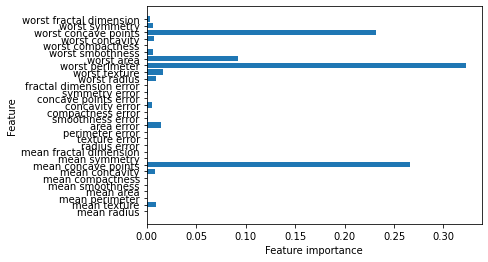

In [20]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)#最大の深さを1に設定
gbrt.fit(X_train,y_train)
plot_feature_importances_canser(gbrt)

勾配ブースティング法の欠点としてはパラメータ設定の重要度が高いことや学習にかかる時間が長いことが挙げられる。
主要なパラメータとして学習率と決定木の数が挙げられる。学習率が小さいと同じ複雑さのモデルの作成に多くの決定木が必要となる。
ここからわかるように決定木と学習率には強い相関関係がある。
また、決定木が多いと過学習を起こす恐れがある。
一般的には決定木はある程度固定して学習率を調整することが多い。
また、深さに関しては低く設定されることが多く、「５」以上になることは少ない。
